# 机器学习常用算法介绍及演示

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  # 划分数据集
%matplotlib inline

## 1、KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier  # KNN
from sklearn.metrics import accuracy_score  # 计算正确率

# 加载数据集
input_file = './fruit_data_with_colors.txt'
data = pd.read_table(input_file)

X = data[['mass', 'width', 'height', 'color_score']]  # 维度
y = data['fruit_label']  # 标准标签

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=0)

# 建立模型
knn = KNeighborsClassifier(n_neighbors=5)

# 训练模型
knn.fit(X=X_train, y=y_train)

# 验证模型
y_pred = knn.predict(X_test)

# 查看正确率
acc = accuracy_score(y_pred=y_pred, y_true=y_test)
print('正确率：', acc)

正确率： 0.5333333333333333


## 2、线性回归

Text(0.5,1,'test data')

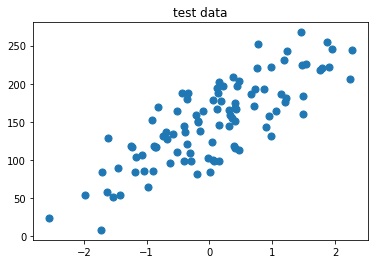

In [48]:
# 人工生成数据样本
from sklearn.datasets import make_regression  # 生成随机的线性回归数据

# 生成样本
X_R1, y_R1 = make_regression(n_samples=100,  # 100 个样本
                             n_features=1,   # 1 个特征
                             n_informative=1, 
                             bias=150.0, 
                             noise=30, 
                             random_state=0)
plt.figure()
plt.scatter(x=X_R1, y=y_R1, marker='o', s=50)
plt.title('test data')

In [49]:
from sklearn.linear_model import LinearRegression  # 线性回归

# 划分数据
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)

# 建立线性回归模型
linreg = LinearRegression()

# 训练模型
linreg.fit(X=X_R1, y=y_R1)

# 输出结果
print('线性模型系数（w）：', linreg.coef_)
print('线性模型常数项（b）：{:.3f}'.format(linreg.intercept_))
print('训练集中 R-squared 得分：{:.3f}'.format(linreg.score(X_train, y_train)))
print('测试集中 R-squared 得分：{:.3f}'.format(linreg.score(X_test, y_test)))

线性模型系数（w）： [43.08728116]
线性模型常数项（b）：147.557
训练集中 R-squared 得分：0.676
测试集中 R-squared 得分：0.517


Text(0,0.5,'y')

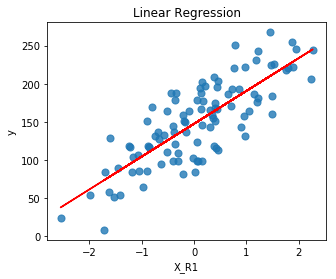

In [50]:
# 可视化结果
plt.figure(figsize=(5, 4))
plt.scatter(X_R1, y_R1, marker='o', s=50, alpha=0.8)  # 样本的散点图
plt.plot(X_R1, linreg.coef_ * X_R1 + linreg.intercept_, 'r-')  # 拟合的直线图。linreg.coef_ * X_R1 + linreg.intercept_ 就是线性回归的公式。
plt.title('Linear Regression')
plt.xlabel('X_R1')
plt.ylabel('y')

## 3、逻辑回归

In [57]:
from sklearn.linear_model import LogisticRegression  # 逻辑回归

# 加载数据集
data = pd.read_table('./fruit_data_with_colors.txt')

X = data[['width', 'height']]  # 特征列
y = data['fruit_label'].copy()  # 标准标签，注意：这里用到 copy()，因为下一步要更改它。

# 将不是 apple 的标签设为 0，二分类为题
y[y != 1] = 0

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=0)

# 不同 C 值的表现
c_value = [0.1, 1, 100]

for c in c_value:
    #